In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preporcesamiento
from sklearn.model_selection import train_test_split
# Modelo
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFECV

In [2]:
data = pd.read_csv('table_reg.csv')

In [3]:
data.head()

,Dates,P_crimines,lang_1,lang_2,lang_3,lang_4,avg_temp
0,2014-01-06,393,NaN,NaN,NaN,NaN,11.0
1,2014-01-07,376,393.0,NaN,NaN,NaN,12.0
2,2014-01-08,430,376.0,393.0,NaN,NaN,13.0
3,2014-01-09,392,430.0,376.0,393.0,NaN,13.0
4,2014-01-10,465,392.0,430.0,376.0,393.0,12.0


In [4]:
data['lang_1'].fillna(data['lang_1'].mode()[0],inplace = True)

In [5]:
data['lang_2'].fillna(data['lang_2'].mode()[0],inplace = True)

In [6]:
data['lang_3'].fillna(data['lang_3'].mode()[0],inplace = True)

In [7]:
data['lang_4'].fillna(data['lang_4'].mode()[0],inplace = True)

In [8]:
data['avg_temp'].fillna(data['avg_temp'].mode()[0],inplace = True)

In [9]:
data.P_crimines[data.P_crimines == 0] = 380
data.lang_1[data.lang_1 == 0] = 390
data.lang_2[data.lang_2 == 0] = 390
data.lang_3[data.lang_3 == 0] = 390
data.lang_4[data.lang_4 == 0] = 390

<ipython-input-9-98f17d22d4a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.P_crimines[data.P_crimines == 0] = 380
<ipython-input-9-98f17d22d4a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lang_1[data.lang_1 == 0] = 390
<ipython-input-9-98f17d22d4a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lang_2[data.lang_2 == 0] = 390
<ipython-input-9-98f17d22d4a6>:4: SettingWithCopyWarning: 
A value is trying to be 

In [10]:
data.head(10)

,Dates,P_crimines,lang_1,lang_2,lang_3,lang_4,avg_temp
0,2014-01-06,393,390.0,390.0,390.0,390.0,11.0
1,2014-01-07,376,393.0,390.0,390.0,390.0,12.0
2,2014-01-08,430,376.0,393.0,390.0,390.0,13.0
3,2014-01-09,392,430.0,376.0,393.0,390.0,13.0
4,2014-01-10,465,392.0,430.0,376.0,393.0,12.0
5,2014-01-11,395,465.0,392.0,430.0,376.0,11.0
6,2014-01-12,369,395.0,465.0,392.0,430.0,12.0
7,2014-01-13,380,369.0,395.0,465.0,392.0,14.0
8,2014-01-14,380,390.0,369.0,395.0,465.0,14.0
9,2014-01-15,380,390.0,390.0,369.0,395.0,14.0


## **Regresión lineal para una variable**

In [11]:
pred = dict(zip(data.P_crimines.unique(),data.lang_1.unique()))

In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
regr = linear_model.LinearRegression()

In [13]:
df = pd.DataFrame(data)

In [14]:
x = df['avg_temp']#indep
y = df['P_crimines']#dep

In [15]:
X = x[:, np.newaxis]
print(X)

[[11.]
 [12.]
 [13.]
 [13.]
 [12.]
 [11.]
 [12.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [13.]
 [13.]
 [13.]
 [14.]
 [13.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [11.]
 [10.]
 [ 9.]
 [10.]
 [12.]
 [13.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [12.]
 [13.]
 [14.]
 [13.]
 [14.]
 [13.]
 [13.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [13.]
 [14.]
 [17.]
 [15.]
 [14.]
 [14.]
 [18.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [15.]
 [16.]
 [16.]
 [16.]
 [14.]
 [13.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [12.]
 [12.]
 [12.]
 [14.]
 [13.]
 [14.]
 [17.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [16.]
 [15.]
 [17.]
 [15.]
 [14.]
 [14.]
 [18.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [16.]
 [21.]
 [24.]
 [23.]
 [18.]
 [16.]
 [17.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [20.]
 [24.]
 [25.]
 [22.]
 [18.]
 [17.]
 [17.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [14.]
 [18.]
 [16.]
 [17.]

<ipython-input-15-fe5416741d13>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, np.newaxis]


In [16]:
# Es el modelo o la prediccion 
print(regr.fit(X,y))
#Imprimir el coeficiente de regrecion lineal
print(regr.coef_)
#Formato
m = regr.coef_[0]
b = regr.intercept_
y_p = m*X+b
print('y = {0}*x+{1}'.format(m,b))
# Este es el modelo de regresion 

LinearRegression()
[4.35554943]
y = 4.355549431200527*x+328.1005619095739


In [17]:
print(X[0:5])
print(regr.predict(X)[0:5])
print('El valor de r2 : ',r2_score(y,y_p))



[[11.]
 [12.]
 [13.]
 [13.]
 [12.]]
[376.01160565 380.36715508 384.72270452 384.72270452 380.36715508]
El valor de r2 :  0.16417591431988077


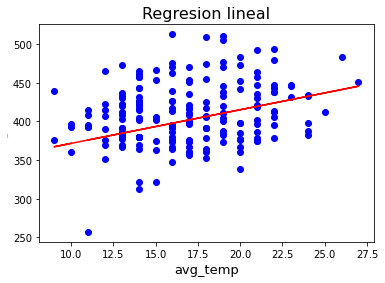

In [18]:
plt.scatter(x,y,color ='blue')
plt.plot(x,y_p,color = 'red')
plt.title('Regresion lineal',fontsize=16)
plt.xlabel('avg_temp',fontsize=13)
plt.ylabel('P_crimines',fontsize=1);

## **Regresion Lineal Multivariable**

In [19]:
from sklearn.model_selection import train_test_split
# ML
from sklearn.neighbors import KNeighborsRegressor

In [20]:
#Para saber que tipo de informacíon contiene le introducimos keys
print(data.keys())

Index(['Dates', 'P_crimines', 'lang_1', 'lang_2', 'lang_3', 'lang_4',
       'avg_temp'],
      dtype='object')


In [21]:
X_multiple = data.iloc[:, 2:7] # Última columna
print(X_multiple)

     lang_1  lang_2  lang_3  lang_4  avg_temp
0     390.0   390.0   390.0   390.0      11.0
1     393.0   390.0   390.0   390.0      12.0
2     376.0   393.0   390.0   390.0      13.0
3     430.0   376.0   393.0   390.0      13.0
4     392.0   430.0   376.0   393.0      12.0
..      ...     ...     ...     ...       ...
352   426.0   440.0   390.0   390.0      13.0
353   370.0   426.0   440.0   390.0      11.0
354   257.0   370.0   426.0   440.0      11.0
355   409.0   257.0   370.0   426.0       9.0
356   376.0   409.0   257.0   370.0      10.0

[357 rows x 5 columns]


In [22]:
Y_multiple = data.P_crimines
print(Y_multiple)

0      393
1      376
2      430
3      392
4      465
      ... 
352    370
353    257
354    409
355    376
356    361
Name: P_crimines, Length: 357, dtype: int64


In [23]:
tscv = TimeSeriesSplit()

TimeSeriesSplit(max_train_size=None, n_splits=5)
 for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
X_train, X_test, Y_train, Y_test = train_test_split(X_multiple, Y_multiple, test_size=0.2)

In [24]:
#Algoritmo a utilizar
lr =  LinearRegression()

In [25]:
#Entrenamiento
lr.fit(X_train, Y_train)

LinearRegression()

In [26]:
#Predicción 
y_pred_lr = lr.predict(X_test)

In [27]:
#Imprimir el coeficiente de regrecion lineal
# Son los valores para nuestra ecuacion son tres valores pues son tres columnas y sería nuesro valor a 
print(lr.coef_)

[ 0.17873055  0.06821489  0.02074791 -0.08718074  3.33431029]


In [28]:
#Para nuestro valor b 
print(lr.intercept_)

272.5245020135738


In [29]:
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error)

In [30]:
print('Linear Regression r**2 % 1.3f' % r2_score(Y_test,y_pred_lr))

Linear Regression r**2  0.313


In [31]:
print('Linear Regression RMSE % 1.3f' %mean_squared_error(Y_test,y_pred_lr, squared=False))

Linear Regression RMSE  27.958


In [32]:
print ("Residuo promedio %.3f" % (abs((Y_test-y_pred_lr)).mean()))

Residuo promedio 19.276


In [33]:
#Para la precisión de nuestro algoritmo 
#Como nos damos cuenta nuestro valor no es muy bueno pues se aleja mucho de 1
print(lr.score(X_train, Y_train))

0.1932171135834958


In [ ]:
#La variable de mayor peso es la temperatura por eso tiene una coeficiente mayor
#el primer lag es de mayor peso con lag1 y temperatura
#